In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimensional Analysis

The material in this lecture is based on the material from Chapter 1 of *Applied Mathematics, 4th edition* by David Logan, and Chapter 2 of *Practical Applied Mathematics*, by Sam Howison.

## Dimensions and units
Essentially, dimensional analysis of an equation modelling a physical process is that all terms separated by $+$, $-$, and $=$ must have the same physical dimensions. You can't add $3\text{cm}$ to $1\text{kJ}$ and expect your answer to make sense.

We need to fix some notation for the dimensions of *primary quantities* as follows:
* mass $[M]$
* length $[L]$
* time $[T]$
* electric current $[I]$
* temperature $[\Theta]$

The SI units for these quantities are $\text{kg}$, $\text{m}$, $\text{s}$, $\text{A}$ (Ampere), $\text{K}$ (Kelvin), respectively. This isn't the only system, but it's by far the most used. Another metric-based system is *cgs* (centimetres/grams/seconds).

There are others, (mole and candela), but we only need these ones. Given these, the dimensions of other *secondary quantities* can be derived from them:
* force $F = \text{mass} \times \text{acceleration}$, so $[F] = [M][L][T]^{-2}$, whose SI unit is the Newton $\text{N}$,
* pressure $P = \text{force per unit area}$, so $[P] = [M][L]^{-1}[T]^{-2}$, whose SI unit is the Pascal $\text{Pa}$,
* energy $E = \text{force} \times \text{distance}$, so $[E] = [M][L]^2[T]^{-2}$, whose SI unit is the Joule $\text{J}$,
* power $ = \text{energy per unit time}$ with unit $\text{Js}^{-1}$,

*etc.*

## Pi Theorem
The main result in dimensional analysis is the so-called Pi Theorem. This theorem states that if there is a physical law relating $n$ dimensioned physical quantities $q_1, \ldots, q_n$, then there is an equivalent physical law relating $k$ dimensionless quantities $\pi_1, \ldots, \pi_k$, where $k \le n$ is the number of independent dimensionless quantities that can be formed. We won't go into depth proving this, but we'll illustrate its use with a couple of examples.

## Example: Computing the yield of an atomic explosion
In such an explosion, a very large amount of energy $E$ is released in a very short time from what is effectively a single point. From the explosion centre a shock wave spreads rapidly outward, and the pressure behind it is far greater than the ambient air pressure.

We could set up a differential equation model to capture this process, and if we could solve it, the end result would be an equation relating the key variables and parameters involved in the process. Let's think what those might be. 
* radius of blast wave front $r$,
* time $t$,
* initial air density $\rho$,
* energy released $E$.

A solution to our equation could be written in the form $g(r, t, \rho, E) = 0$. However, we are interested in seeing what we can find out by dimensional considerations alone. Let's first write down the dimensions of our quantities in terms of the dimensions of the *primary quantites* above.
* $[t] = [T]$,
* $[r] = [L]$,
* $[\rho] = [M][L]^{-3}$,
* $[E] = [M][L]^2[T]^{-2}$

We now want to find all possible dimensionless combinations of these. We look at *monomials* in the dimensioned quantities
\begin{equation}
    \pi = t^a r^b \rho^c E^d
\end{equation}
and try to find values of $a, b, c, d$ such that $\pi$ is dimensionless. 
\begin{equation}
    [\pi] = [T]^a [L]^b ([M][L]^{-3})^c ([M][L]^2[T]^{-2})^d = [M]^{c + d} [L]^{b - 3c + 2d} [T]^{a - 2d}
\end{equation}
These dimensions must all cancel, so we have a homogeneous system
\begin{equation}
    \left\{
        \begin{aligned}
            c + d &= 0 \\
            b - 3c + 2d &= 0 \\
            a - 2d &= 0
        \end{aligned}
    \right.
\end{equation}
We put it into matrix form
\begin{equation*}
    \begin{bmatrix}
        0 & 0 & 1 & 1 \\
        0 & 1 & -3 & 2 \\
        1 & 0 & 0 & -2 
    \end{bmatrix}
    \begin{bmatrix}
        a \\ b \\ c \\ d 
    \end{bmatrix} 
    =
    \begin{bmatrix}
        0 \\ 0 \\ 0
    \end{bmatrix}
\end{equation*}

We can see that this system is of rank 3, and so there is a one-dimensional nullspace, spanned by $(a, b, c, d) = (2, -5, -1, 1)$. Subsituting back into our expression for $\pi$, there is only one independent dimensionless quantity that can be formed,
\begin{equation}
    \pi = \frac{Et^2}{r^5 \rho}
\end{equation}
Of course any power of this will still be dimensionless, so it's not the only possible form it might take.

The Pi Theorem says that our physical law $g(r, t, \rho, E) = 0$ is equivalent to a physical law in $\pi$ alone
\begin{equation}
    f\left(\frac{Et^2}{r^5 \rho}\right) = 0
\end{equation}
It follows that $\pi$ must be a constant
\begin{equation}
    \frac{Et^2}{r^5\rho} = D.
\end{equation}
        
We can solve this for $r$, giving
\begin{equation}
    r = C \left(\frac{Et^2}{\rho}\right)^{\frac{1}{5}}
\end{equation}

i.e. from dimensional reasoning alone, we have shown that $r$ depends on the two-fifths power of time. G.I. Taylor first used this argument in the 1940s to infer the energy yield of the first atomic explosions based only on timed photographs. Without utilising any physics other than dimensions, and intuition as to the quantities involved, it is remarkable that this solution can be found.

### Computing yield for Trinity explosion

The following data is form the Trinity explosion. The actual yield of the explosion is known to be approximately 21 kilotons (1 kiloton = 4.186e12 Joules). We show how the data is fitted below. Taylor showed that the constant $C$ can be taken to be 1 (don't worry too much about why), and we can use air density as the standard value $1.25 \text{kg/m}^3$.

First, we'll verify that the relationship between $r$ and $t^{2/5}$ is approximately linear by eyeballing it:

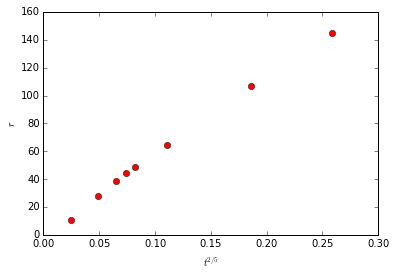

In [2]:
t_data = np.array([0.10, 0.52, 1.08, 1.5, 1.93, 4.07, 15.0, 34.0]) * 1e-3 # seconds
r_data = np.array([11, 28.2, 38.9, 44.4, 48.7, 64.3, 106.5, 145]) # m

plt.plot(t_data**0.4, r_data, 'ro')
plt.xlabel('$t^{2/5}$')
plt.ylabel('$r$')


Now we'll fit a function of the form $r = at^{2/5}$ by least squares, and see how it looks:

yield energy is 17.90 kilotons


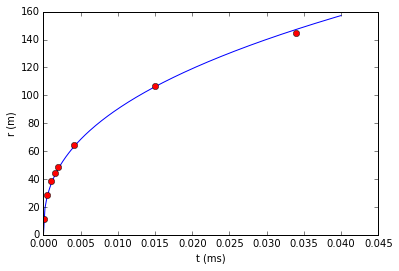

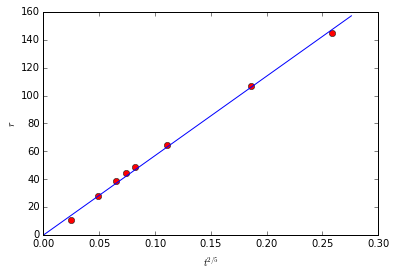

In [5]:
rho = 1.25

kiloton_in_joules = 4.186e12

# Form matrix for least squares
A = np.array([t_data**0.4]).T
x = np.linalg.lstsq(A, r_data)[0][0]
E = x**5 * rho
print "yield energy is {:.2f} kilotons".format(E / kiloton_in_joules)

t = np.linspace(0, 40e-3, 200)

plt.figure()
plt.plot(t, (E*t**2 / rho)**0.2)
plt.plot(t_data, r_data, 'ro')
plt.xlabel('t (ms)')
plt.ylabel('r (m)')
plt.figure()
plt.plot(t_data**0.4, r_data, 'ro')
plt.plot(t**0.4, x*t**0.4)
plt.xlabel('$t^{2/5}$')
plt.ylabel('$r$')